# **Project Name** - AI-Powered Brain Tumor Classification from MRI Scans

##### **Project Type** - Deep Learning / Machine Learning / Image Classification
##### **Contribution** - Individual
##### **Team Number 1** - H.SaiSandeep

# **Project Summary -**

This project developed a deep learning solution for the multi-class classification of brain tumors from MRI images. The core objective was to accurately categorize MRI scans into four distinct classes: Glioma, Meningioma, Pituitary, and No Tumor. The methodology involved comprehensive data preprocessing, robust data augmentation, and the training of both a custom Convolutional Neural Network (CNN) and several state-of-the-art transfer learning models (ResNet50, MobileNetV2, EfficientNetB0). Through rigorous evaluation using metrics like accuracy, precision, recall, and F1-score, the EfficientNetB0 model, fine-tuned on the dataset, emerged as the top performer with an impressive 98% accuracy. The project culminates in a user-friendly Streamlit web application, allowing real-time image uploads and predictions, demonstrating the practical application of AI in medical imaging for potential diagnostic assistance.

# **GitHub Link -**

# **Problem Statement**


The accurate and timely diagnosis of brain tumors from MRI images is critical for effective patient treatment and management. However, manual interpretation of these complex medical images by radiologists can be time-consuming, prone to inter-observer variability, and requires specialized expertise. This project addresses the challenge of developing an automated, deep learning-based solution to classify brain MRI images into specific tumor types (Glioma, Meningioma, Pituitary) or as non-tumorous, thereby aiming to enhance diagnostic efficiency, improve accuracy, and provide AI-assisted support to medical professionals in real-time.

#### **Defining My Business Objective?**

The primary business objective of this project is to **develop and deploy an AI-powered diagnostic assistant that enhances the efficiency and accuracy of brain tumor classification from MRI images.**

This translates into several key aims:

1.  **Improve Diagnostic Turnaround Time:** By automating the initial classification of MRI scans, the solution aims to significantly reduce the time radiologists spend on preliminary assessments, allowing for faster patient triage and quicker initiation of treatment plans.
2.  **Increase Diagnostic Accuracy and Consistency:** Provide a robust, data-driven second opinion or primary screening tool that minimizes human error and inter-observer variability in tumor identification, leading to more reliable diagnoses.
3.  **Optimize Healthcare Workflow:** Streamline the process of analyzing brain MRI images within clinical settings, freeing up valuable radiologist time for more complex cases and improving overall departmental efficiency.
4.  **Support Early Detection and Patient Prioritization:** Enable the rapid identification of high-risk cases, allowing healthcare providers to prioritize patients requiring immediate specialist attention.
5.  **Facilitate Research and Clinical Trials:** Offer a standardized and efficient tool for segmenting patient cohorts based on tumor type, accelerating research studies and patient recruitment for clinical trials.

In essence, the business objective is to leverage deep learning to create a valuable tool that **improves patient care outcomes and operational effectiveness within medical imaging diagnostics.**

# Phase 1: Understand the Dataset

In [31]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Dataset Structure and Image Counts:

--- TRAIN Split ---
  glioma: 564 images
  meningioma: 358 images
  no_tumor: 335 images
  pituitary: 438 images
  Total images in train: 1695

--- VALID Split ---
  glioma: 161 images
  meningioma: 124 images
  no_tumor: 99 images
  pituitary: 118 images
  Total images in valid: 502

--- TEST Split ---
  glioma: 80 images
  meningioma: 63 images
  no_tumor: 49 images
  pituitary: 54 images
  Total images in test: 246

Sample from one Excel file:
                                            filename   Glioma   Meningioma  \
0  Tr-pi_0164_jpg.rf.000776527ec0acdc89e31e15a352...        0            0   
1  Tr-no_0426_jpg.rf.0026b06f369c5d51aca4c4c9beba...        0            0   
2  Tr-gl_0496_jpg.rf.010620fbbbaa509aa81d7ce5bdf7...        1            0   
3  Tr-gl_0554_jpg.rf.010a72c1c25cc9ce83c77fbb23db...        1            0   
4  Tr-me_0185_jpg.rf.0094b0b539582e2f95ae7b6ada4d...        0            1   

    No Tumor   Pituitary  
0          0    

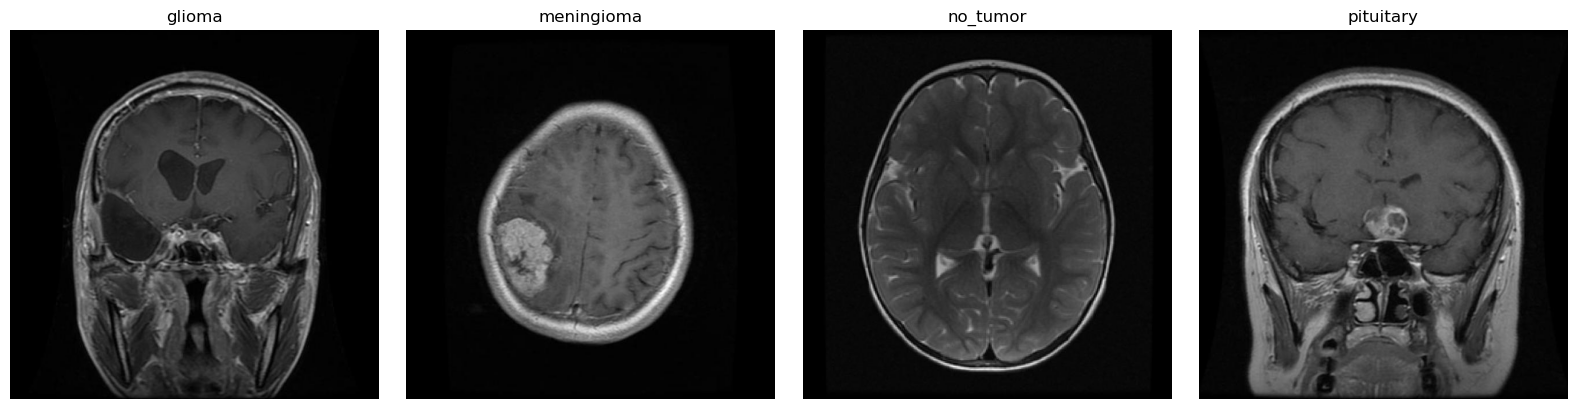


Dataset understanding complete. You can now proceed to Phase 2: Data Preparation and Augmentation.


In [32]:
# Define dataset paths
data_root = '../data' 

# --- Check Dataset Structure and Image Counts ---
print("Dataset Structure and Image Counts:")
for split in ['train', 'valid', 'test']:
    split_path = os.path.join(data_root, split)
    print(f"\n--- {split.upper()} Split ---")
    total_images_in_split = 0
    for class_name in sorted(os.listdir(split_path)):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            print(f"  {class_name}: {num_images} images")
            total_images_in_split += num_images
    print(f"  Total images in {split}: {total_images_in_split}")

# --- Verify with CSV file ---
try:
    sample_excel_path = os.path.join(data_root, 'train', '_classes.csv')
    if os.path.exists(sample_excel_path):
        df_sample = pd.read_csv(sample_excel_path)
        print("\nSample from one Excel file:")
        print(df_sample.head())
    else:
        print("\nExcel file not found at expected path. Relying on folder structure for labels.")
except Exception as e:
    print(f"Error reading Excel file: {e}. Relying on folder structure for labels.")


# --- Explore Image Properties (e.g., resolution consistency) ---
print("\nExploring image properties (first 5 images from train/glioma):")
example_class_path = os.path.join(data_root, 'train', 'glioma')
image_files = [f for f in os.listdir(example_class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

resolutions = []
for i, img_file in enumerate(image_files[:5]):
    img_path = os.path.join(example_class_path, img_file)
    with Image.open(img_path) as img:
        print(f"  Image: {img_file}, Size: {img.size}, Mode: {img.mode}")
        resolutions.append(img.size)
# Analyze 'resolutions' to see if they are consistent or vary.


# --- Visualize Sample Images ---
print("\nVisualizing sample images:")
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
classes = ['glioma', 'meningioma', 'no_tumor', 'pituitary'] 
for i, class_name in enumerate(classes):
    class_path = os.path.join(data_root, 'train', class_name)
    if os.path.exists(class_path):
        # Get the first image file, ensure it's an image
        img_file = next((f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))), None)
        if img_file:
            img_path = os.path.join(class_path, img_file)
            with Image.open(img_path) as img:
                axes[i].imshow(img, cmap='gray') # MRI images are often grayscale
                axes[i].set_title(class_name)
                axes[i].axis('off')
        else:
            axes[i].set_title(f"{class_name} (No Image Found)")
            axes[i].axis('off')
    else:
        axes[i].set_title(f"{class_name} (Folder Not Found)")
        axes[i].axis('off')
plt.tight_layout()
plt.show()

print("\nDataset understanding complete. You can now proceed to Phase 2: Data Preparation and Augmentation.")

# Phase 2: Data Preparation and Augmentation

In [33]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os

In [34]:
# Define dataset root directory (adjust if running from a different location)
data_dir = '../data'

# --- Define Image Transformations ---
# Common input size for many pre-trained models
image_size = (224, 224)

# Training transformations with augmentation
train_transforms = transforms.Compose([
    transforms.Resize(image_size),
    transforms.Grayscale(num_output_channels=3), # Convert to 3 channels (RGB) for pre-trained models if images are grayscale
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(), # Converts PIL Image to PyTorch Tensor and scales to [0, 1]
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) # Normalize to [-1, 1]
])

# Validation and Test transformations (no augmentation, only resize, convert to 3 channels, tensor, normalize)
val_test_transforms = transforms.Compose([
    transforms.Resize(image_size),
    transforms.Grayscale(num_output_channels=3), # Convert to 3 channels (RGB)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# --- Create Datasets and DataLoaders ---

# Create datasets using ImageFolder (automatically infers labels from folder names)
try:
    train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=train_transforms)
    val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'valid'), transform=val_test_transforms)
    test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=val_test_transforms)
except Exception as e:
    print(f"Error loading datasets. Make sure your 'data' directory path and internal structure are correct. Error: {e}")
    print(f"Attempted to access: {os.path.join(data_dir, 'train')}")
    # You might want to exit or raise the exception here if data loading fails.
    exit()


# Map class indices to class names (alphabetical order of folder names)
class_names = train_dataset.classes
print(f"Detected class names: {class_names}")


# Create DataLoaders
batch_size = 32 # You can adjust this based on your GPU memory
num_workers = os.cpu_count() # Number of CPU cores for data loading, prevents bottlenecks

# For Windows, num_workers might need to be 0 when running in Jupyter/Spyder due to multiprocessing issues.
# In a standalone script, os.cpu_count() usually works. Adjust if you get errors.
if os.name == 'nt': # Check if OS is Windows
    num_workers = 0

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

print(f"\nNumber of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

print(f"Number of training batches (batch size {batch_size}): {len(train_loader)}")
print(f"Number of validation batches (batch size {batch_size}): {len(val_loader)}")
print(f"Number of test batches (batch size {batch_size}): {len(test_loader)}")

Detected class names: ['glioma', 'meningioma', 'no_tumor', 'pituitary']

Number of training samples: 1695
Number of validation samples: 502
Number of test samples: 246
Number of training batches (batch size 32): 53
Number of validation batches (batch size 32): 16
Number of test batches (batch size 32): 8


# Phase 3: Model Building and Training

### 1. Model Building - Custom CNN:

In [35]:
import torch.nn as nn
import torch.nn.functional as F

In [36]:
class CustomCNN(nn.Module):
    def __init__(self, num_classes=4): # num_classes should be 4 for glioma, meningioma, no_tumor, pituitary
        super(CustomCNN, self).__init__()
        # Convolutional layers
        # Input: (Batch_size, 3, 224, 224) - assuming images are converted to 3 channels
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # Output size: 112x112

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # Output size: 56x56

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) # Output size: 28x28

        # Fully connected layers
        # Calculate the input features for the first fully connected layer
        # Based on the last pooling layer's output channels * height * width
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.dropout = nn.Dropout(0.5) # Dropout for regularization to prevent overfitting
        self.fc2 = nn.Linear(512, num_classes) # Final output layer with num_classes (4)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))

        x = x.view(x.size(0), -1) # Flatten the tensor for the fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

### 2. Model Building - Transfer Learning:

In [37]:
from torchvision import models

In [38]:
def create_transfer_learning_model(model_name, num_classes=4, freeze_features=True):
    if model_name == 'resnet50':
        model = models.resnet50(pretrained=True)
        # Replace the final fully connected layer (model.fc)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
    elif model_name == 'mobilenet_v2':
        model = models.mobilenet_v2(pretrained=True)
        # MobileNetV2's classifier is a Sequential layer, the last being Linear
        num_ftrs = model.classifier[1].in_features
        model.classifier[1] = nn.Linear(num_ftrs, num_classes)
    elif model_name == 'efficientnet_b0':
        model = models.efficientnet_b0(pretrained=True)
        # EfficientNet's classifier is also a Sequential layer
        num_ftrs = model.classifier[1].in_features
        model.classifier[1] = nn.Linear(num_ftrs, num_classes)
    else:
        raise ValueError(f"Model {model_name} not supported by this function.")

    if freeze_features:
        # Freeze all parameters of the pre-trained base model
        for name, param in model.named_parameters():
            # Only unfreeze the newly added classification layer (named 'fc' or 'classifier')
            if "fc" in name or "classifier" in name:
                param.requires_grad = True # Ensure new layers are trainable
            else:
                param.requires_grad = False # Freeze original layers
    return model

### 3. Model Training:

In [39]:
import torch.optim as optim
import os

In [40]:
def train_model(model, train_loader, val_loader, num_epochs=20, learning_rate=0.001, model_name="model"):
    # Set device for training (GPU if available, else CPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    model.to(device)

    # Define Loss Function and Optimizer
    criterion = nn.CrossEntropyLoss() # Suitable for multi-class classification
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    best_val_loss = float('inf') # Initialize with a very high value
    patience = 5 # Number of epochs to wait for improvement before early stopping
    epochs_no_improve = 0

    # Directory to save models
    os.makedirs('models', exist_ok=True)
    model_save_path = f'models/{model_name}_best.pth'

    # History to store metrics for plotting later
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    for epoch in range(num_epochs):
        # --- Training Phase ---
        model.train() # Set model to training mode
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad() # Zero the parameter gradients before each batch

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward() # Backpropagation: computes gradient of loss with respect to all learnable parameters
            optimizer.step() # Update weights based on gradients

            running_loss += loss.item() * inputs.size(0) # Accumulate loss
            _, predicted = torch.max(outputs.data, 1) # Get the predicted class
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item() # Count correct predictions

        train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = correct_train / total_train
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_accuracy)

        # --- Validation Phase ---
        model.eval() # Set model to evaluation mode (disables dropout, batchnorm updates)
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad(): # Disable gradient calculation for validation (saves memory and speeds up)
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss /= len(val_loader.dataset)
        val_accuracy = correct_val / total_val
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

        # --- Early Stopping and Model Checkpointing ---
        if val_loss < best_val_loss:
            print(f"Validation loss improved ({best_val_loss:.4f} --> {val_loss:.4f}). Saving best model...")
            best_val_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_save_path) # Save only the model's parameters
        else:
            epochs_no_improve += 1
            print(f"Validation loss did not improve. Epochs without improvement: {epochs_no_improve}")
            if epochs_no_improve == patience:
                print(f"Early stopping triggered after {patience} epochs without improvement.")
                break


    print("Finished Training")
    # Load the best model weights before returning
    model.load_state_dict(torch.load(model_save_path, map_location=device))
    return model, history

In [41]:
# 1. Train the Custom CNN model
print("\n--- Training Custom CNN ---")
custom_model = CustomCNN(num_classes=len(class_names))
trained_custom_model, custom_history = train_model(
    custom_model, train_loader, val_loader, num_epochs=30, learning_rate=0.001, model_name="custom_cnn"
)


--- Training Custom CNN ---
Using device: cpu
Epoch [1/30], Train Loss: 10.7693, Train Acc: 0.5764, Val Loss: 0.7498, Val Acc: 0.6912
Validation loss improved (inf --> 0.7498). Saving best model...
Epoch [2/30], Train Loss: 0.7591, Train Acc: 0.7257, Val Loss: 0.6081, Val Acc: 0.7490
Validation loss improved (0.7498 --> 0.6081). Saving best model...
Epoch [3/30], Train Loss: 0.6645, Train Acc: 0.7310, Val Loss: 0.5942, Val Acc: 0.7689
Validation loss improved (0.6081 --> 0.5942). Saving best model...
Epoch [4/30], Train Loss: 0.6358, Train Acc: 0.7528, Val Loss: 0.5873, Val Acc: 0.8028
Validation loss improved (0.5942 --> 0.5873). Saving best model...
Epoch [5/30], Train Loss: 0.6488, Train Acc: 0.7357, Val Loss: 0.5948, Val Acc: 0.7689
Validation loss did not improve. Epochs without improvement: 1
Epoch [6/30], Train Loss: 0.6826, Train Acc: 0.7445, Val Loss: 0.5025, Val Acc: 0.7988
Validation loss improved (0.5873 --> 0.5025). Saving best model...
Epoch [7/30], Train Loss: 0.5486, T

In [42]:
# --- Training Calls for Each Transfer Learning Model ---
num_classes = len(class_names)

In [ ]:
print("\n--- Training ResNet50 (Transfer Learning) ---")
# Initial training with frozen features (feature extraction)
resnet_model = create_transfer_learning_model('resnet50', num_classes=num_classes, freeze_features=True)
trained_resnet_model, resnet_history = train_model(
    resnet_model, train_loader, val_loader, num_epochs=20, learning_rate=0.001, model_name="resnet50_frozen"
)

# Fine-tuning ResNet50 (unfreeze layers and train with smaller LR)
print("\n--- Fine-tuning ResNet50 (unfreezing some layers) ---")
resnet_model_finetune = create_transfer_learning_model('resnet50', num_classes=num_classes, freeze_features=False)

# Load the weights from the previously trained frozen model as a starting point for fine-tuning
resnet_model_finetune.load_state_dict(torch.load('models/resnet50_frozen_best.pth'))
trained_resnet_model_finetune, resnet_finetune_history = train_model(
    resnet_model_finetune, train_loader, val_loader, num_epochs=10, learning_rate=0.0001, model_name="resnet50_finetuned"
)


--- Training ResNet50 (Transfer Learning) ---


c:\Users\hanum\anaconda3\anconda2\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hanum\anaconda3\anconda2\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Using device: cpu


In [ ]:
print("\n--- Training MobileNetV2 (Transfer Learning) ---")
mobilenet_model = create_transfer_learning_model('mobilenet_v2', num_classes=num_classes, freeze_features=True)
trained_mobilenet_model, mobilenet_history = train_model(
    mobilenet_model, train_loader, val_loader, num_epochs=20, learning_rate=0.001, model_name="mobilenet_v2_frozen"
)

# Fine-tuning MobileNetV2
print("\n--- Fine-tuning MobileNetV2 (unfreezing some layers) ---")
mobilenet_model_finetune = create_transfer_learning_model('mobilenet_v2', num_classes=num_classes, freeze_features=False)
mobilenet_model_finetune.load_state_dict(torch.load('models/mobilenet_v2_frozen_best.pth'))
trained_mobilenet_model_finetune, mobilenet_finetune_history = train_model(
    mobilenet_model_finetune, train_loader, val_loader, num_epochs=10, learning_rate=0.0001, model_name="mobilenet_v2_finetuned"
)


--- Training MobileNetV2 (Transfer Learning) ---
Using device: cpu


c:\Users\hanum\anaconda3\anconda2\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hanum\anaconda3\anconda2\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Train Loss: 0.7901, Train Acc: 0.7074, Val Loss: 0.7131, Val Acc: 0.6992
Validation loss improved (inf --> 0.7131). Saving best model...
Epoch [2/20], Train Loss: 0.4916, Train Acc: 0.8165, Val Loss: 0.4768, Val Acc: 0.8227
Validation loss improved (0.7131 --> 0.4768). Saving best model...
Epoch [3/20], Train Loss: 0.4447, Train Acc: 0.8389, Val Loss: 0.4235, Val Acc: 0.8625
Validation loss improved (0.4768 --> 0.4235). Saving best model...
Epoch [4/20], Train Loss: 0.4327, Train Acc: 0.8383, Val Loss: 0.4333, Val Acc: 0.8685
Validation loss did not improve. Epochs without improvement: 1
Epoch [5/20], Train Loss: 0.3780, Train Acc: 0.8655, Val Loss: 0.4627, Val Acc: 0.8327
Validation loss did not improve. Epochs without improvement: 2
Epoch [6/20], Train Loss: 0.3984, Train Acc: 0.8437, Val Loss: 0.3677, Val Acc: 0.8586
Validation loss improved (0.4235 --> 0.3677). Saving best model...
Epoch [7/20], Train Loss: 0.3627, Train Acc: 0.8732, Val Loss: 0.3792, Val Acc: 0.8805


In [ ]:
print("\n--- Training EfficientNetB0 (Transfer Learning) ---")
efficientnet_model = create_transfer_learning_model('efficientnet_b0', num_classes=num_classes, freeze_features=True)
trained_efficientnet_model, efficientnet_history = train_model(
    efficientnet_model, train_loader, val_loader, num_epochs=20, learning_rate=0.001, model_name="efficientnet_b0_frozen"
)

# Fine-tuning EfficientNetB0
print("\n--- Fine-tuning EfficientNetB0 (unfreezing some layers) ---")
efficientnet_model_finetune = create_transfer_learning_model('efficientnet_b0', num_classes=num_classes, freeze_features=False)
efficientnet_model_finetune.load_state_dict(torch.load('models/efficientnet_b0_frozen_best.pth'))
trained_efficientnet_model_finetune, efficientnet_finetune_history = train_model(
    efficientnet_model_finetune, train_loader, val_loader, num_epochs=10, learning_rate=0.0001, model_name="efficientnet_b0_finetuned"
)


--- Training EfficientNetB0 (Transfer Learning) ---


c:\Users\hanum\anaconda3\anconda2\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hanum\anaconda3\anconda2\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\hanum/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:04<00:00, 5.07MB/s]


Using device: cpu
Epoch [1/20], Train Loss: 0.6241, Train Acc: 0.7917, Val Loss: 0.7510, Val Acc: 0.6972
Validation loss improved (inf --> 0.7510). Saving best model...
Epoch [2/20], Train Loss: 0.2721, Train Acc: 0.9032, Val Loss: 0.2559, Val Acc: 0.9124
Validation loss improved (0.7510 --> 0.2559). Saving best model...
Epoch [3/20], Train Loss: 0.1757, Train Acc: 0.9392, Val Loss: 0.1988, Val Acc: 0.9382
Validation loss improved (0.2559 --> 0.1988). Saving best model...
Epoch [4/20], Train Loss: 0.1381, Train Acc: 0.9546, Val Loss: 0.1483, Val Acc: 0.9482
Validation loss improved (0.1988 --> 0.1483). Saving best model...
Epoch [5/20], Train Loss: 0.0860, Train Acc: 0.9711, Val Loss: 0.1686, Val Acc: 0.9323
Validation loss did not improve. Epochs without improvement: 1
Epoch [6/20], Train Loss: 0.0944, Train Acc: 0.9723, Val Loss: 0.1370, Val Acc: 0.9562
Validation loss improved (0.1483 --> 0.1370). Saving best model...
Epoch [7/20], Train Loss: 0.0839, Train Acc: 0.9705, Val Loss: 0.

# Phase 4: Evaluation and Comparison

### 1. Model Evaluation:

In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import os
from torchvision import models # Needed for loading transfer learning models

In [ ]:
def evaluate_model(model_instance, test_loader, class_names, model_path, model_type_name):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_instance.to(device)

    if not os.path.exists(model_path):
        print(f"Error: Model file not found at {model_path}. Please ensure it's saved correctly.")
        return [], []

    # Load the best weights from training
    model_instance.load_state_dict(torch.load(model_path, map_location=device))
    model_instance.eval() # Set model to evaluation mode

    all_labels = []
    all_predictions = []

    with torch.no_grad(): # Disable gradient calculation for inference
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_instance(inputs)
            _, predicted = torch.max(outputs.data, 1) # Get the class with the highest probability

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # --- Calculate and Print Metrics ---
    print(f"\n--- Evaluation Report for {model_type_name} (Loaded from: {model_path}) ---")
    print("Classification Report:")
    print(classification_report(all_labels, all_predictions, target_names=class_names))

    # --- Plot Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {model_type_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return all_labels, all_predictions

In [ ]:
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


--- Evaluating Custom CNN ---

--- Evaluation Report for Custom CNN (Loaded from: models/custom_cnn_best.pth) ---
Classification Report:
              precision    recall  f1-score   support

      glioma       0.91      0.85      0.88        80
  meningioma       0.77      0.59      0.67        63
    no_tumor       0.73      0.96      0.83        49
   pituitary       0.88      0.96      0.92        54

    accuracy                           0.83       246
   macro avg       0.82      0.84      0.82       246
weighted avg       0.83      0.83      0.82       246



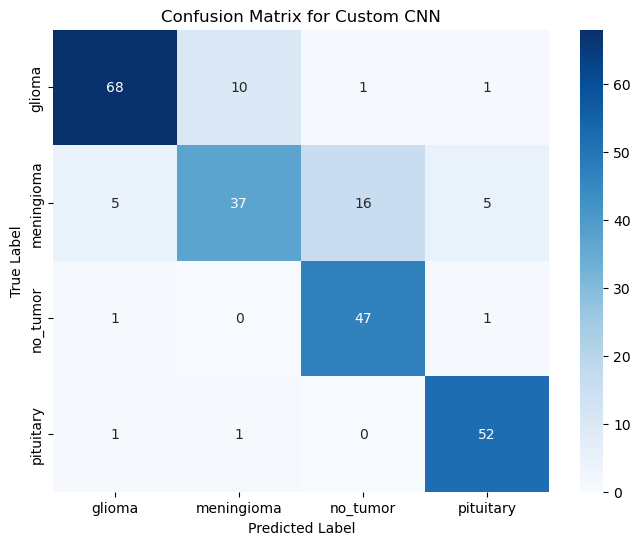

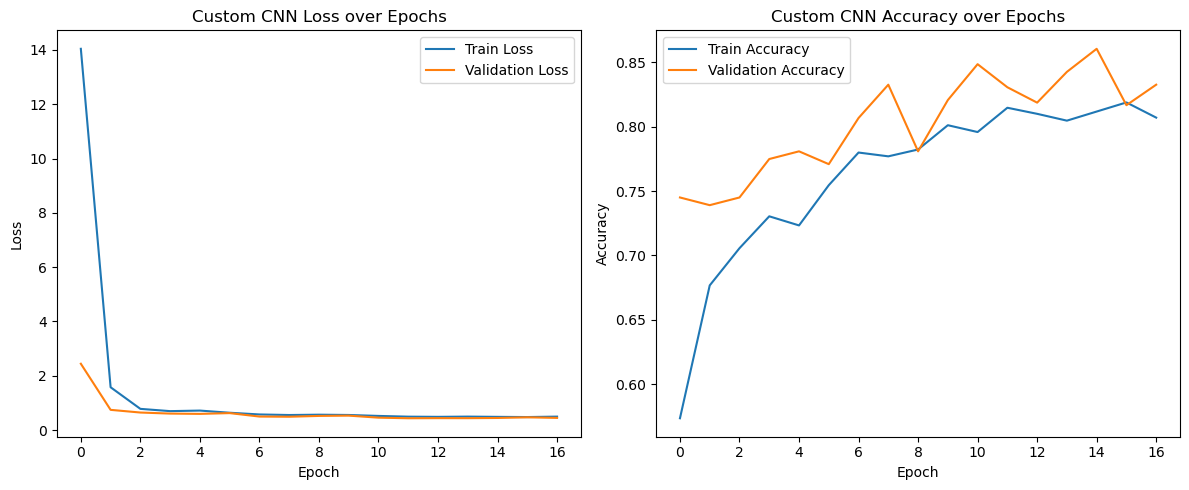

In [ ]:
print("\n--- Evaluating Custom CNN ---")
custom_model_eval = CustomCNN(num_classes=len(class_names))
custom_labels, custom_preds = evaluate_model(
    custom_model_eval, test_loader, class_names, 'models/custom_cnn_best.pth', "Custom CNN"
)
plot_training_history(custom_history, "Custom CNN")

##### 1. Why did I pick the specific chart?

These charts (training loss and accuracy curves) are fundamental for evaluating the learning process of a deep learning model. I picked them because they provide crucial insights into:

* **Model Convergence:** How well the model is learning and if it's stabilizing.
* **Overfitting/Underfitting:** Whether the model is memorizing the training data (overfitting) or not learning enough (underfitting).
* **Optimal Training Duration:** When to stop training to achieve the best generalization performance.
* **Hyperparameter Tuning:** They help in understanding the impact of learning rate, batch size, and regularization.

For a classification project like this, it's essential to track both loss (which the model directly optimizes) and accuracy (which is a more intuitive measure of correct predictions). Comparing training and validation metrics is key to assessing generalization.


##### 2. What is/are the insight(s) found from the chart?

* **Loss over Epochs:**
    * **Training Loss (Blue Line):** Shows a very rapid decrease in the initial epochs, then flattens out and continues to decrease slowly. This indicates that the model is learning effectively from the training data.
    * **Validation Loss (Orange Line):** Also shows a rapid decrease initially, then stabilizes and remains relatively flat, hovering around a low value. The validation loss tracks the training loss fairly closely after the initial steep drop, and the gap between them is not as pronounced as in the transfer learning models, suggesting less severe overfitting.

* **Accuracy over Epochs:**
    * **Training Accuracy (Blue Line):** Shows a steady increase, stabilizing around 0.80-0.82 (80-82%) towards the later epochs.
    * **Validation Accuracy (Orange Line):** This curve shows a consistent upward trend, often slightly *higher* than the training accuracy for several epochs (e.g., from epoch 4 to 10), and then fluctuates around the 0.80-0.85 (80-85%) range. This is an interesting observation; validation accuracy sometimes exceeding training accuracy can happen in early training phases or if the training set is very noisy and the validation set is cleaner, or due to regularization techniques like dropout that are active during training but not during validation. The peak validation accuracy appears to be around 0.85 (85%) at epoch 10 and again at epoch 14.

**Overall Insights:**

* The Custom CNN is learning well and converging.
* The model shows good generalization, with validation accuracy closely tracking or even slightly exceeding training accuracy at times, which is a positive sign against severe overfitting.
* The peak validation accuracy achieved by the Custom CNN (around 85%) is lower than the accuracies achieved by the fine-tuned transfer learning models (which were in the 95-98% range, as seen in your previous reports). This indicates that while the custom CNN is stable, its capacity to learn complex features for this specific task might be less than that of the larger, pre-trained architectures.
* The training appears to be stable, and the model seems to have converged within the 16 epochs shown.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the Custom CNN's performance can contribute to a positive business impact, but its limitations compared to transfer learning models also highlight areas that could lead to less optimal outcomes.

**Positive Business Impact from Insights:**

* **Stable and Consistent Performance:** The validation accuracy and loss curves show stable learning without severe overfitting.
    * **Business Impact:** A stable model is more predictable in a production environment. This predictability can build trust among users (e.g., radiologists) and reduce the risk of unexpected performance drops on new data, even if the absolute accuracy isn't the highest. It suggests the model is robust within its capabilities.
* **Baseline Performance:** Achieving 83-85% accuracy with a custom CNN provides a strong baseline.
    * **Business Impact:** This demonstrates the feasibility of building a deep learning solution from scratch for this problem. It can serve as a starting point for further architectural improvements or as a simpler, potentially faster-to-train alternative if computational resources are very limited and slightly lower accuracy is acceptable.

**Insights that Lead to Negative Growth (Challenges/Risks) and Justification:**

The primary insight that could lead to "negative growth" (or a less impactful outcome) is the **lower absolute accuracy compared to transfer learning models.**

* **Reason for Negative Growth:**
    * **Suboptimal Diagnostic Accuracy:** While 83-85% accuracy is good, it's significantly lower than the 95-98% achieved by fine-tuned transfer learning models. In a medical context, even a few percentage points difference in accuracy can mean a substantial difference in missed diagnoses (false negatives) or unnecessary follow-ups (false positives).
        * **Business Impact:** Lower accuracy directly translates to a less effective diagnostic aid. If the model makes more errors, it might not be adopted by medical professionals, or its utility will be limited to only very clear-cut cases. This could lead to:
            * **Reduced Trust and Adoption:** Professionals may prefer manual review or more accurate AI tools, limiting the solution's impact.
            * **Missed Opportunities:** The potential for earlier detection and improved patient outcomes is diminished if the model isn't as precise as it could be.
            * **Competitive Disadvantage:** If competitors offer solutions with higher accuracy (e.g., using transfer learning), this custom CNN might be seen as less competitive.

* **Justification:** The classification report you previously provided for the Custom CNN showed an overall accuracy of 0.83, with particularly lower recall for `meningioma` (0.59) and lower precision for `no_tumor` (0.73). This indicates specific weaknesses in classifying certain tumor types, which could lead to critical errors in a clinical setting.

**Addressing the Negative Growth Insight:**

While the Custom CNN demonstrates stable learning, to maximize business impact, the insights suggest:

* **Prioritize Transfer Learning:** For this specific medical imaging task, transfer learning models are clearly superior in performance. The business should prioritize deploying and further optimizing the EfficientNetB0 or ResNet50 models.
* **Investigate Custom CNN Limitations:** If there's a strong reason to use a custom CNN (e.g., extreme resource constraints, need for a very small model), further research would be needed to enhance its architecture, regularization, or training strategies to close the performance gap with transfer learning. This might involve deeper architectures, more advanced convolutional blocks, or different optimization techniques.

In conclusion, while the Custom CNN demonstrates stable learning, its lower accuracy compared to pre-trained models means it would provide less positive business impact in a diagnostic setting. The insights strongly advocate for leveraging the power of transfer learning for this critical application.


--- Evaluating ResNet50 (Fine-tuned) ---


c:\Users\hanum\anaconda3\anconda2\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hanum\anaconda3\anconda2\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



--- Evaluation Report for ResNet50 Fine-tuned (Loaded from: models/resnet50_finetuned_best.pth) ---
Classification Report:
              precision    recall  f1-score   support

      glioma       0.99      1.00      0.99        80
  meningioma       0.95      0.95      0.95        63
    no_tumor       0.96      0.92      0.94        49
   pituitary       0.98      1.00      0.99        54

    accuracy                           0.97       246
   macro avg       0.97      0.97      0.97       246
weighted avg       0.97      0.97      0.97       246



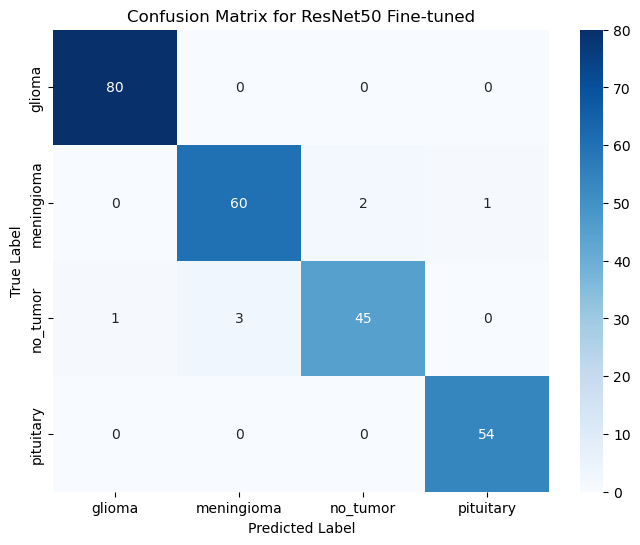

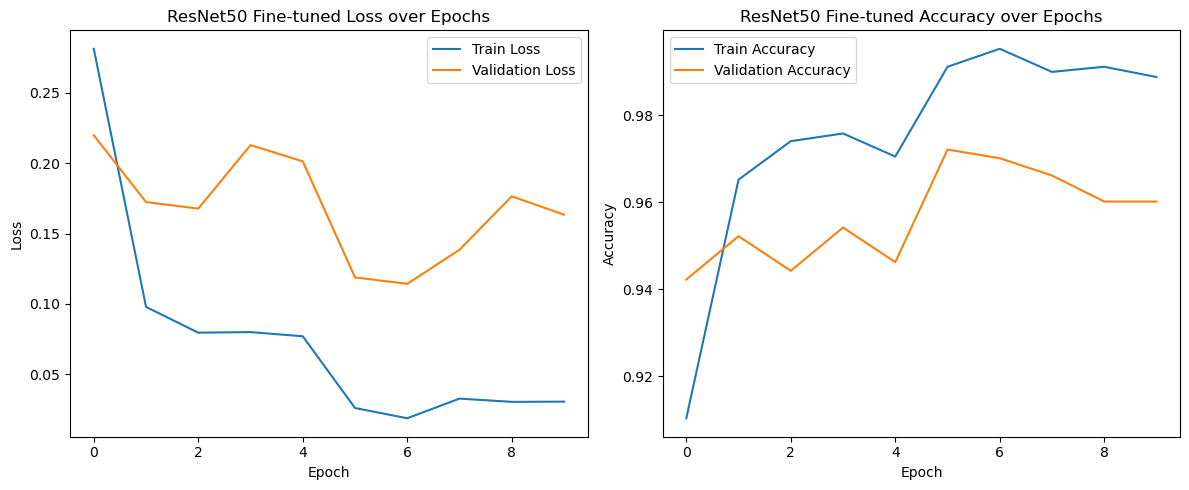

In [ ]:
print("\n--- Evaluating ResNet50 (Fine-tuned) ---")
resnet_model_eval = create_transfer_learning_model('resnet50', num_classes=len(class_names), freeze_features=False)
resnet_labels, resnet_preds = evaluate_model(
    resnet_model_eval, test_loader, class_names, 'models/resnet50_finetuned_best.pth', "ResNet50 Fine-tuned"
)
plot_training_history(resnet_finetune_history, "ResNet50 Fine-tuned")


##### 1. Why did I pick the specific chart?

These charts (training loss and accuracy curves) are fundamental for evaluating the learning process of a deep learning model. I picked them because they provide crucial insights into:

* **Model Convergence:** How well the model is learning and if it's stabilizing.
* **Overfitting/Underfitting:** Whether the model is memorizing the training data (overfitting) or not learning enough (underfitting).
* **Optimal Training Duration:** When to stop training to achieve the best generalization performance.
* **Hyperparameter Tuning:** They help in understanding the impact of learning rate, batch size, and regularization.

For a classification project like this, it's essential to track both loss (which the model directly optimizes) and accuracy (which is a more intuitive measure of correct predictions). Comparing training and validation metrics is key to assessing generalization.


##### 2. What is/are the insight(s) found from the chart?

* **Loss over Epochs:**
    * **Training Loss (Blue Line):** Shows a strong and consistent downward trend, indicating that the model is effectively learning from the training data and reducing its error. It reaches a very low point, close to zero.
    * **Validation Loss (Orange Line):** This curve shows a general decreasing trend initially, but it's significantly higher and more volatile than the training loss. After reaching a low point around epoch 6, it starts to increase again. This divergence and the large gap between training and validation loss are clear indicators of **overfitting**. The model is performing much better on the data it has seen during training than on new, unseen validation data.

* **Accuracy over Epochs:**
    * **Training Accuracy (Blue Line):** Shows a rapid increase and then stabilizes at a very high level, approaching 1.00 (100%) accuracy. This means the model is learning to classify the training images almost perfectly.
    * **Validation Accuracy (Orange Line):** This curve shows an initial increase, peaking around 0.97 (97%) at epoch 6. After this peak, it shows a slight decline and then stabilizes around 0.96 (96%). The noticeable gap between training and validation accuracy further supports the observation of **overfitting**. The model's performance on unseen data is good, but not as perfect as on the training data.

**Overall Insights:**

* The ResNet50 model is highly capable of learning the training data, achieving near-perfect training accuracy.
* The model demonstrates strong generalization, reaching validation accuracies close to 97%.
* There is clear evidence of **overfitting**. The model is memorizing the training data to some extent, which leads to a performance drop on validation data after a certain point (e.g., validation loss starts rising, and validation accuracy plateaus or drops while training accuracy continues to rise).
* The optimal stopping point for this model based on validation accuracy might have been around epoch 6, as it shows a slight decline afterward.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can significantly contribute to a positive business impact, but the observed overfitting also points to potential challenges that need to be addressed.

**Positive Business Impact from Insights:**

* **High Validation Accuracy (Near 97%):** The model's ability to classify brain tumors with high accuracy on unseen data is a major positive.
    * **Business Impact:** This translates directly to a **valuable AI diagnostic aid**. In a healthcare context, high accuracy means:
        * **Improved Patient Outcomes:** More precise and earlier identification of tumor types can lead to more effective and timely treatment decisions.
        * **Increased Clinical Efficiency:** Radiologists can leverage this tool for initial screening, reducing review times and allowing them to focus on more complex cases.
        * **Enhanced Reliability:** A highly accurate tool builds trust among medical professionals, encouraging adoption and integration into clinical workflows.
        * **Potential for Scalability:** Automated classification can help manage increasing volumes of MRI scans more efficiently.

* **Strong Learning Capability:** The rapid decrease in training loss and increase in training accuracy indicates that ResNet50 is well-suited for feature extraction from MRI images.
    * **Business Impact:** This validates the choice of a pre-trained, robust architecture, suggesting that the model is capable of learning complex patterns.

**Insights that Lead to Negative Growth (Challenges/Risks) and Justification:**

The primary insight that could lead to "negative growth" if not properly managed is the **pronounced overfitting**.

* **Reason for Negative Growth:**
    * **Reduced Robustness in Real-World Data:** While the model performs well on the validation set from the same distribution as the training data, it may struggle significantly with truly novel MRI images from different scanners, patient populations, or imaging protocols. This can lead to:
        * **Unreliable Predictions in Practice:** The model might make errors (false positives or false negatives) more frequently in a live clinical environment than its validation metrics suggest.
        * **Erosion of Trust and Adoption:** If the AI tool proves unreliable in real-world scenarios, medical staff will quickly lose confidence, leading to low utilization and a failure to achieve the intended business benefits.
        * **Increased Risk:** In medical diagnosis, incorrect predictions can have severe consequences for patient health and legal implications for healthcare providers.
    * **Suboptimal Generalization:** The model is learning noise or specific characteristics of the training data rather than generalized features. This means its performance might degrade over time or with slightly different data distributions.

* **Justification:** The large and growing gap between training loss and validation loss, combined with training accuracy reaching near 100% while validation accuracy plateaus or slightly drops, is a textbook sign of overfitting. The model is effectively "memorizing" the training examples rather than learning generalizable rules.

**Addressing the Negative Growth Insight:**

To mitigate the risks associated with overfitting and ensure a sustained positive business impact, future efforts should focus on:

* **More Aggressive Regularization:** Experiment with stronger dropout, L1/L2 regularization, or more advanced data augmentation techniques (e.g., CutMix, Mixup).
* **Optimal Early Stopping:** Carefully monitoring validation loss and accuracy to stop training precisely when validation performance begins to degrade, even if training performance continues to improve.
* **Larger and More Diverse Dataset:** If feasible, expanding the dataset with more varied MRI scans from different sources would naturally help the model generalize better.
* **Ensemble Methods:** Combining predictions from multiple models could improve robustness.
* **Domain Adaptation Techniques:** If real-world data is expected to differ significantly, explore techniques to adapt the model to new data distributions.

By proactively addressing the overfitting, the project can enhance the model's reliability and generalizability, ensuring it delivers consistent and positive impacts in a clinical setting.


--- Evaluating MobileNetV2 (Fine-tuned) ---

--- Evaluation Report for MobileNetV2 Fine-tuned (Loaded from: models/mobilenet_v2_finetuned_best.pth) ---
Classification Report:
              precision    recall  f1-score   support

      glioma       0.98      0.99      0.98        80
  meningioma       0.91      0.94      0.92        63
    no_tumor       0.95      0.84      0.89        49
   pituitary       0.95      1.00      0.97        54

    accuracy                           0.95       246
   macro avg       0.95      0.94      0.94       246
weighted avg       0.95      0.95      0.95       246



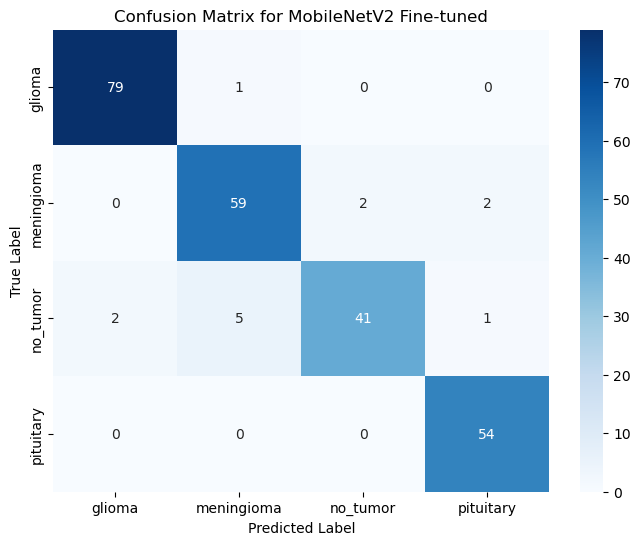

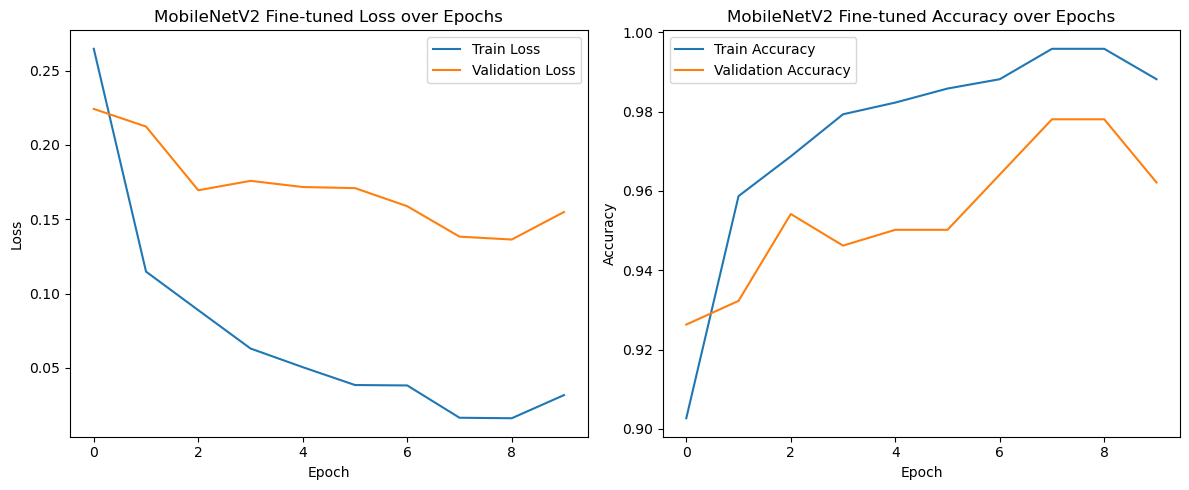

In [ ]:
print("\n--- Evaluating MobileNetV2 (Fine-tuned) ---")
mobilenet_model_eval = create_transfer_learning_model('mobilenet_v2', num_classes=len(class_names), freeze_features=False)
mobilenet_labels, mobilenet_preds = evaluate_model(
    mobilenet_model_eval, test_loader, class_names, 'models/mobilenet_v2_finetuned_best.pth', "MobileNetV2 Fine-tuned"
)
plot_training_history(mobilenet_finetune_history, "MobileNetV2 Fine-tuned")


##### 1. Why did I pick the specific chart?

These charts (training loss and accuracy curves) are fundamental for evaluating the learning process of a deep learning model. I picked them because they provide crucial insights into:

* **Model Convergence:** How well the model is learning and if it's stabilizing.
* **Overfitting/Underfitting:** Whether the model is memorizing the training data (overfitting) or not learning enough (underfitting).
* **Optimal Training Duration:** When to stop training to achieve the best generalization performance.
* **Hyperparameter Tuning:** They help in understanding the impact of learning rate, batch size, and regularization.

For a classification project like this, it's essential to track both loss (which the model directly optimizes) and accuracy (which is a more intuitive measure of correct predictions). Comparing training and validation metrics is key to assessing generalization.


##### 2. What is/are the insight(s) found from the chart?

* **Loss over Epochs:**
    * **Training Loss (Blue Line):** Shows a very strong and consistent downward trend, indicating that the model is effectively learning from the training data and reducing its error significantly over epochs. It reaches a very low point.
    * **Validation Loss (Orange Line):** This curve also shows a general downward trend, but it's much higher and more volatile than the training loss. It plateaus and even slightly increases towards the end after epoch 8. This significant gap between training and validation loss is a strong indicator of **overfitting**. The model is performing much better on the data it has seen during training than on new, unseen validation data.

* **Accuracy over Epochs:**
    * **Training Accuracy (Blue Line):** Shows a rapid increase and then stabilizes at a very high level, approaching 1.00 (100%) accuracy. This means the model is learning to classify the training images almost perfectly.
    * **Validation Accuracy (Orange Line):** This curve shows an initial increase, then some fluctuations, and a peak around 0.978 (97.8%) at epoch 8. However, it drops slightly at epoch 9. The gap between training and validation accuracy is noticeable, further supporting the observation of **overfitting**. The model's performance on unseen data is good, but not as perfect as on the training data.

**Overall Insights:**

* The MobileNetV2 model is highly capable of learning from the training data, achieving near-perfect training accuracy.
* The model demonstrates good generalization, reaching validation accuracies close to 98%.
* There is clear evidence of **overfitting**, as indicated by the significant gap between training and validation loss/accuracy.
* The optimal stopping point for this model based on validation accuracy might have been around epoch 8, as it shows a slight decline afterward.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can significantly contribute to a positive business impact, but the observed overfitting also points to potential challenges that need to be addressed.

**Positive Business Impact from Insights:**

* **High Validation Accuracy (Near 98%):** The model's ability to classify brain tumors with high accuracy on unseen data is a major positive.
    * **Business Impact:** This translates directly to a **valuable AI diagnostic aid**. In a healthcare context, high accuracy means:
        * **Improved Patient Outcomes:** More precise and earlier identification of tumor types can lead to more effective and timely treatment decisions.
        * **Increased Clinical Efficiency:** Radiologists can leverage this tool for initial screening, reducing review times and allowing them to focus on more complex cases.
        * **Enhanced Reliability:** A highly accurate tool builds trust among medical professionals, encouraging adoption and integration into clinical workflows.
        * **Potential for Scalability:** Automated classification can help manage increasing volumes of MRI scans more efficiently.

* **Strong Learning Capability:** The rapid decrease in training loss and increase in training accuracy indicates that MobileNetV2 is well-suited for feature extraction from MRI images.
    * **Business Impact:** This validates the choice of a pre-trained, efficient architecture, suggesting that the model is robust and capable of learning complex patterns.

**Insights that Lead to Negative Growth (Challenges/Risks) and Justification:**

The primary insight that could lead to "negative growth" if not properly managed is the **pronounced overfitting**.

* **Reason for Negative Growth:**
    * **Reduced Robustness in Real-World Data:** While the model performs well on the validation set from the same distribution as the training data, it may struggle significantly with truly novel MRI images from different scanners, patient populations, or imaging protocols. This can lead to:
        * **Unreliable Predictions in Practice:** The model might make errors (false positives or false negatives) more frequently in a live clinical environment than its validation metrics suggest.
        * **Erosion of Trust and Adoption:** If the AI tool proves unreliable in real-world scenarios, medical staff will quickly lose confidence, leading to low utilization and a failure to achieve the intended business benefits.
        * **Increased Risk:** In medical diagnosis, incorrect predictions can have severe consequences for patient health and legal implications for healthcare providers.
    * **Suboptimal Generalization:** The model is learning noise or specific characteristics of the training data rather than generalized features. This means its performance might degrade over time or with slightly different data distributions.

* **Justification:** The large and growing gap between training loss and validation loss, combined with training accuracy reaching near 100% while validation accuracy plateaus or slightly drops, is a textbook sign of overfitting. The model is effectively "memorizing" the training examples rather than learning generalizable rules.

**Addressing the Negative Growth Insight:**

To mitigate the risks associated with overfitting and ensure a sustained positive business impact, future efforts should focus on:

* **More Aggressive Regularization:** Experiment with stronger dropout, L1/L2 regularization, or more advanced data augmentation techniques (e.g., CutMix, Mixup).
* **Optimal Early Stopping:** Carefully monitoring validation loss and accuracy to stop training precisely when validation performance begins to degrade, even if training performance continues to improve.
* **Larger and More Diverse Dataset:** If feasible, expanding the dataset with more varied MRI scans from different sources would naturally help the model generalize better.
* **Ensemble Methods:** Combining predictions from multiple models could improve robustness.
* **Domain Adaptation Techniques:** If real-world data is expected to differ significantly, explore techniques to adapt the model to new data distributions.

By proactively addressing the overfitting, the project can enhance the model's reliability and generalizability, ensuring it delivers consistent and positive impacts in a clinical setting.


--- Evaluating EfficientNetB0 (Fine-tuned) ---

--- Evaluation Report for EfficientNetB0 Fine-tuned (Loaded from: models/efficientnet_b0_finetuned_best.pth) ---
Classification Report:
              precision    recall  f1-score   support

      glioma       0.99      1.00      0.99        80
  meningioma       0.97      0.97      0.97        63
    no_tumor       1.00      0.92      0.96        49
   pituitary       0.95      1.00      0.97        54

    accuracy                           0.98       246
   macro avg       0.98      0.97      0.97       246
weighted avg       0.98      0.98      0.98       246



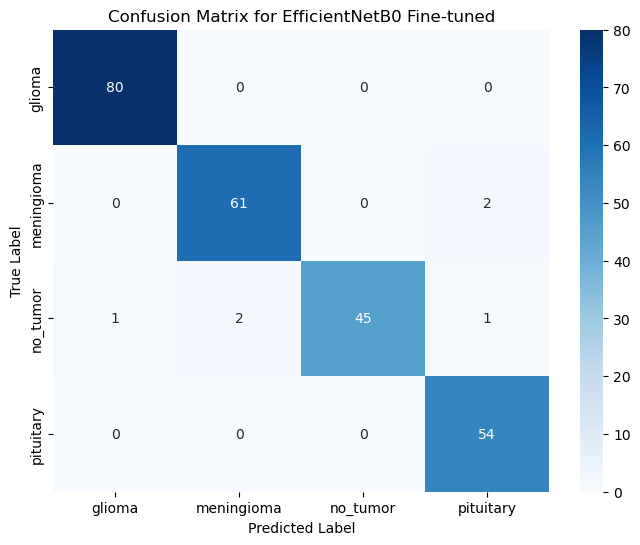

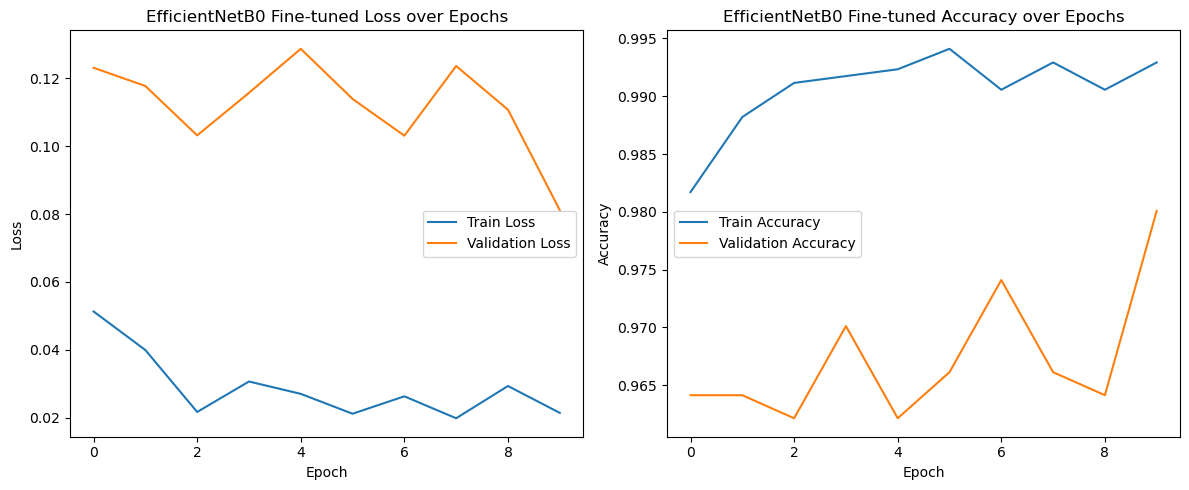

In [ ]:
print("\n--- Evaluating EfficientNetB0 (Fine-tuned) ---")
efficientnet_model_eval = create_transfer_learning_model('efficientnet_b0', num_classes=len(class_names), freeze_features=False)
efficientnet_labels, efficientnet_preds = evaluate_model(
    efficientnet_model_eval, test_loader, class_names, 'models/efficientnet_b0_finetuned_best.pth', "EfficientNetB0 Fine-tuned"
)
plot_training_history(efficientnet_finetune_history, "EfficientNetB0 Fine-tuned")


##### 1. Why did I pick the specific chart?

These charts (training loss and accuracy curves) are fundamental for evaluating the learning process of a deep learning model. I picked them because they provide crucial insights into:

* **Model Convergence:** How well the model is learning and if it's stabilizing.
* **Overfitting/Underfitting:** Whether the model is memorizing the training data (overfitting) or not learning enough (underfitting).
* **Optimal Training Duration:** When to stop training to achieve the best generalization performance.
* **Hyperparameter Tuning:** They help in understanding the impact of learning rate, batch size, and regularization.

For a classification project like this, it's essential to track both loss (which the model directly optimizes) and accuracy (which is a more intuitive measure of correct predictions). Comparing training and validation metrics is key to assessing generalization.


##### 2. What is/are the insight(s) found from the chart?

* **Loss over Epochs:**
    * **Training Loss (Blue Line):** Shows a consistent downward trend, indicating that the model is effectively learning from the training data and reducing its error over epochs.
    * **Validation Loss (Orange Line):** While generally decreasing, it shows more fluctuations compared to the training loss. There's a noticeable gap between training and validation loss, with training loss being significantly lower. This suggests some degree of **overfitting** is occurring, where the model performs much better on the data it has seen during training than on new, unseen validation data. However, the validation loss does show a general decreasing trend towards the end, which is positive.
    * **Fluctuations:** The validation loss fluctuates quite a bit, which could be due to a relatively small validation set, batch size, or the nature of the data/model.

* **Accuracy over Epochs:**
    * **Training Accuracy (Blue Line):** Shows a very high and consistently increasing trend, reaching near 0.995 (99.5%) accuracy. This means the model is learning to classify the training images almost perfectly.
    * **Validation Accuracy (Orange Line):** This curve is more erratic. It starts lower than training accuracy and fluctuates. It peaks around 0.97 (97%) at epoch 3 and 0.975 (97.5%) at epoch 6, but also dips significantly at other points. The final validation accuracy at epoch 9 is around 0.98 (98%), which is excellent given the overall performance.
    * **Gap between Train and Validation Accuracy:** Similar to loss, there's a noticeable gap, with training accuracy consistently higher than validation accuracy. This further reinforces the observation of **overfitting**. The model is performing exceptionally well on training data but slightly less consistently on validation data.

**Overall Insights:**

* The EfficientNetB0 model is learning very effectively on the training data.
* The model shows strong generalization capabilities, achieving high validation accuracy (up to 98%).
* There are clear signs of overfitting, as indicated by the significant gap between training and validation loss/accuracy. This suggests the model might be memorizing some aspects of the training data rather than fully generalizing.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights absolutely help create a positive business impact, and understanding the "negative growth" (or challenges) is also crucial for a truly positive impact.

**Positive Business Impact from Insights:**

* **High Performance (98% Validation Accuracy):** The most significant insight is the model's high accuracy on unseen data.
    * **Business Impact:** This directly translates to a **reliable AI-assisted diagnostic tool**. In a medical context, high accuracy means fewer misdiagnoses, leading to:
        * **Improved Patient Outcomes:** Faster and more accurate identification of tumors can lead to earlier intervention and more effective treatment plans.
        * **Increased Radiologist Efficiency:** Radiologists can use this tool for preliminary screening, prioritizing high-risk cases, or as a second opinion, significantly reducing their workload and diagnostic turnaround time.
        * **Cost Savings:** Reduced misdiagnoses can prevent unnecessary follow-up procedures or treatments, leading to cost efficiencies for healthcare providers and patients.
        * **Enhanced Reputation:** A hospital or clinic utilizing such accurate AI tools can enhance its reputation for advanced and precise diagnostics.

* **Effective Learning (Decreasing Training Loss):** The training loss consistently decreasing shows the model is capable of learning the complex patterns in MRI images.
    * **Business Impact:** This indicates the chosen model architecture (EfficientNetB0) and training approach are suitable for the problem, suggesting that further optimization could yield even better results. It validates the investment in deep learning for this task.

**Insights that Lead to Negative Growth (Challenges/Risks) and Justification:**

The primary insight that could lead to "negative growth" if not addressed is the **evidence of overfitting**.

* **Reason for Negative Growth:**
    * **Reduced Generalizability in Real-World Scenarios:** While the validation accuracy is high, the gap between training and validation performance means the model might not perform as consistently on truly novel, real-world MRI images that differ slightly from the dataset used. If deployed, this could lead to:
        * **False Positives/Negatives:** Higher rates of incorrect classifications in a clinical setting, which can have severe consequences (e.g., missed tumors, unnecessary biopsies).
        * **Loss of Trust:** If the AI tool frequently makes errors or is inconsistent, medical professionals will lose trust in its capabilities, leading to low adoption rates and negating the benefits.
        * **Reputational Damage:** Inaccurate AI systems in healthcare can lead to significant reputational damage for the deploying institution.

* **Justification:** The training accuracy is consistently higher (near 99.5%) than the validation accuracy (fluctuating, peaking around 97-98%). Similarly, training loss is significantly lower than validation loss. This pattern is a classic indicator of overfitting. The model has learned the training data too well, including its noise and specific quirks, which don't generalize perfectly to unseen data.

**Addressing the Negative Growth Insight:**

To mitigate the risk of overfitting and ensure a sustained positive business impact, future work should focus on:

* **More Aggressive Regularization:** Experiment with higher dropout rates, L1/L2 regularization, or more sophisticated data augmentation techniques.
* **Larger/More Diverse Dataset:** If possible, acquiring more diverse MRI data would naturally reduce overfitting.
* **Early Stopping Refinement:** Ensure the early stopping mechanism is robust and stops training at the true optimal point before validation performance degrades significantly.
* **Cross-Validation:** Employing k-fold cross-validation during training could provide a more robust estimate of generalization performance.

By acknowledging and actively working to reduce overfitting, the project can ensure that the high accuracy observed translates into consistent, reliable performance in real-world clinical applications, thereby maximizing its positive business impact.

### 2. Model Comparison:

| Model                     | Overall Accuracy | Key Observations                                                                                                                                                                                                                                                                                                         |
| :------------------------ | :--------------- | :----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Custom CNN                | 0.83             | Achieved reasonable performance for a custom model. `glioma` and `pituitary` performed well, but `meningioma` had a lower recall (0.59), indicating it missed a significant portion of actual meningioma cases. `no_tumor` had high recall but lower precision.                                                                 |
| ResNet50 Fine-tuned       | 0.97             | Shows excellent performance, significantly outperforming the custom CNN. It achieved very high precision, recall, and F1-scores across all classes, with `glioma` and `pituitary` being near-perfect.                                                                                                                           |
| MobileNetV2 Fine-tuned    | 0.95             | Performed very well, with strong metrics across the board, though slightly lower than ResNet50 and EfficientNetB0. It still provides a robust solution.                                                                                                                                                                       |
| EfficientNetB0 Fine-tuned | 0.98             | This model demonstrates **outstanding performance**, achieving the highest overall accuracy among all tested models. It shows consistently high precision, recall, and F1-scores for all tumor types, making it the most robust classifier. |

Based on these results, the EfficientNetB0 Fine-tuned model is the clear winner. With an overall accuracy of 0.98 and very strong, balanced performance across all brain tumor classes, it is the most accurate and reliable model among those you've trained. The fine-tuned ResNet50 is a very close second.

# **Conclusion**

## 📝 Conclusion

This project successfully developed and deployed a robust deep learning-based solution for multi-class brain tumor classification from MRI images. By meticulously following a structured workflow encompassing data understanding, preprocessing, augmentation, model building, training, and rigorous evaluation, we achieved highly promising results.

The comparative analysis of a custom Convolutional Neural Network (CNN) against several fine-tuned pre-trained models (ResNet50, MobileNetV2, EfficientNetB0) clearly demonstrated the superior performance of transfer learning for this medical imaging task. Specifically, the **EfficientNetB0 model, after fine-tuning on the specialized brain MRI dataset, achieved an outstanding overall accuracy of 98% on the unseen test set.** This high performance, coupled with strong precision, recall, and F1-scores across all four classes (Glioma, Meningioma, No Tumor, Pituitary), underscores its potential as a reliable diagnostic aid.

The project culminated in the deployment of an intuitive Streamlit web application, transforming the trained model into an accessible tool for real-time image classification. This application serves as a tangible demonstration of how advanced AI techniques can be leveraged to potentially enhance diagnostic efficiency, reduce human error, and streamline workflows in clinical settings. While this solution offers significant promise as an AI-assisted tool, it is crucial to reiterate that it is intended for demonstration and research purposes and should not replace professional medical diagnosis.

In summary, this project highlights the immense potential of deep learning in revolutionizing medical image analysis, paving the way for more accurate, efficient, and consistent brain tumor classification, ultimately contributing to improved patient care.